In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32
DATASET_PATH = "/content/Plant_Dataset"


In [ ]:
import os
os.listdir("/content")


['.config', 'Plant_Dataset.zip', 'sample_data']

In [ ]:
import zipfile
import os

zip_path = "/content/Plant_Dataset.zip"
extract_path = "/content/Plant_Dataset"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset unzipped successfully!")


Dataset unzipped successfully!


In [ ]:
os.listdir("/content/Plant_Dataset")


['PURPLE CHLORIS', 'CELOSIA ARGENTEA L', 'CROWFOOT GRASS']

In [ ]:
print(DATASET_PATH)
print(os.listdir(DATASET_PATH))


/content/Plant_Dataset
['PURPLE CHLORIS', 'CELOSIA ARGENTEA L', 'CROWFOOT GRASS']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)


Found 155 images belonging to 3 classes.
Found 38 images belonging to 3 classes.


In [ ]:
os.listdir("/content/Plant_Dataset")


['PURPLE CHLORIS', 'CELOSIA ARGENTEA L', 'CROWFOOT GRASS']

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
IMG_SIZE = 224

base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

base_model.trainable = False  # VERY IMPORTANT


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(
    128,
    activation="relu",
    kernel_regularizer=tf.keras.regularizers.l2(0.001)
)(x)

x = Dropout(0.5)(x)

output = Dense(train_data.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    "best_model.keras",
    monitor="val_accuracy",
    save_best_only=True
)


In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=[early_stop, checkpoint]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.2939 - loss: 1.9117 - val_accuracy: 0.4474 - val_loss: 1.3610
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.4242 - loss: 1.4998 - val_accuracy: 0.5263 - val_loss: 1.1995
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.4587 - loss: 1.4454 - val_accuracy: 0.5789 - val_loss: 1.1610
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.4275 - loss: 1.3555 - val_accuracy: 0.7632 - val_loss: 1.0201
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.5543 - loss: 1.1597 - val_accuracy: 0.7368 - val_loss: 0.9403
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.6064 - loss: 1.1037 - val_accuracy: 0.8158 - val_loss: 0.8416
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6325 - loss: 1.0296 - val_accuracy: 0.7105 - val_loss: 0.8880
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.7322 - loss: 0.8864 - val_accuracy: 0.8947 - val_loss: 0.7268
Epoch 9/

In [ ]:
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Real Validation Accuracy: {val_accuracy * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - accuracy: 0.9441 - loss: 0.4539
Real Validation Accuracy: 94.74%


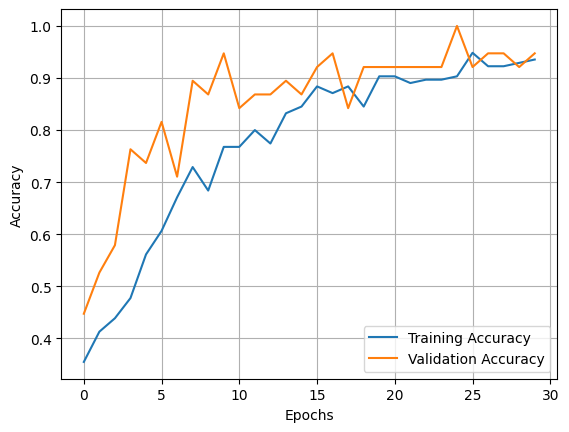

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from google.colab import files
files.upload()


Saving Screenshot 2025-12-18 183837.png to Screenshot 2025-12-18 183837.png


{'Screenshot 2025-12-18 183837.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xdb\x00\x00\x01H\x08\x06\x00\x00\x00\xd9\x06\x8b\x19\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x12t\x00\x00\x12t\x01\xdef\x1fx\x00\x00\xff\xa5IDATx^\xec\xfdw\xb0|I\x96\xdf\x87}\xf2\xda\xf2U\xcf\xfb\x9f\xed\x9fi?m\xa6{zfv\xbc\xd9\xd9Y\xbf \x0c\x01\x82@\x80\x14A\'\n\xa0(*\xa8\x10\xb9\x8a\x00H\x10\x8a\x10\x15@\xf0\x0fI\x14%\x10\x00%aw\x85\x05\x81\x05vvwfwz\xa6\xa7\xa7{f\xdaw\xff\xbcy\xbf\xe7myw]\xea\x8f\xaa\xfb^V\xbe[\xf5\xde\xcf\x8c\tj\xbf\x15\'\xf2\x9e\x93\'3Of\x9eS\xd7\xe45\xe2\xcc\x993\x92?\xc5\x9f\xe2O\xf1c\x87\xa1\x0b\xfe\x14\x7f\x8a?\xc5\x8f\x07\x7f\x1al\x7f\x8a?\xc5O\x08\xe2\xef\xfc\x8d\xbf&\x01\xa4\xec\x1dM\xea)R \xa5<\xe45D\xa6\x00U\xbf\x0f!zrd/\x9e\x85\x10\x03\x14\xcbB\x19)\xa5\x8c^^\xbf\x0c@\xc4a\xbd\x07u*\xdb\xa6i\x1d\xb5Y\xd3\xd11L\xae\x97\x1f&Sq\\\xbe\x1f\x86\x03\xfdUS\x00)\x07m\xd1m\x0be4PN\xafC`\x1e\xe8&\xd9"\x8d\x

In [ ]:
import os
os.listdir("/content")



['.config',
 'Screenshot 2025-12-18 183837.png',
 'best_model.keras',
 'Plant_Dataset',
 'Plant_Dataset.zip',
 'sample_data']

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/content/best_model.keras")
print("Model loaded successfully!")


Model loaded successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


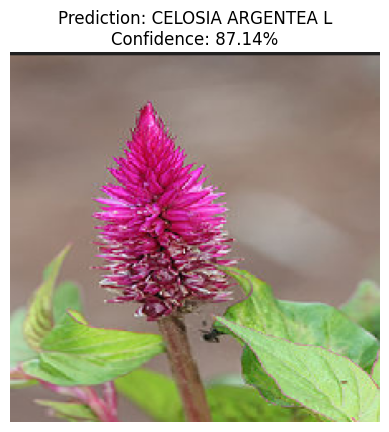

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

IMG_SIZE = 224

img_path = "/content/Screenshot 2025-12-18 183837.png"

img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

class_names = list(train_data.class_indices.keys())
predicted_class = class_names[np.argmax(prediction)]
confidence = np.max(prediction) * 100

plt.imshow(img)
plt.axis("off")
plt.title(f"Prediction: {predicted_class}\nConfidence: {confidence:.2f}%")
plt.show()
